In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.impute import SimpleImputer
import warnings
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output, display

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    ExtraTreesClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    HistGradientBoostingClassifier,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
df1 = pd.read_csv("tess_clean.csv")
df2 = pd.read_csv("k2_clean.csv")
df3 = pd.read_csv("kepler_clean.csv")

In [3]:
df1.head()

,pl_pnum,disposition,pl_tranmid,orbital_period,transit_duration,transit_depth,planet_radius,insolation,equilibrium_temp,st_tmag,st_dist,stellar_temp,stellar_logg,stellar_radius
0,1,FP,2459229.630,2.171348,2.01722,656.886099,5.818163,22601.94858,3127.204052,9.604000,485.735,10249.0,4.19,2.16986
1,1,PC,2459987.949,1.931646,3.16600,1286.000000,11.215400,44464.50000,4045.000000,9.423440,295.862,7070.0,4.03,2.01000
2,1,FP,2459224.688,1.867557,1.40800,1500.000000,23.752900,2860.61000,2037.000000,9.299501,943.109,8924.0,NaN,5.73000
3,1,FP,2458493.396,2.743230,3.16700,383.410000,NaN,1177.36000,1631.000000,9.300300,7728.170,5388.5,4.15,NaN
4,1,FP,2459987.047,3.573014,3.37000,755.000000,11.311300,54679.30000,4260.000000,9.135500,356.437,9219.0,4.14,2.15000


In [4]:
df2.head()

,orbital_period,transit_duration,transit_depth,planet_radius,planet_radiuJ,pl_masse,pl_massj,insolation,equilibrium_temp,pl_orbeccen,inclination,stellar_temp,stellar_radius,stellar_mass,st_met,stellar_logg,discoverymethod,disposition
0,41.688644,2.7888,0.1357,2.355454,0.210139,12.2000,0.038385,78.0,809.0,0.075,89.52554,5703.00,0.956122,0.963861,-0.06,4.38000,Transit,CONFIRMED
1,41.685500,2.7888,0.1357,2.230000,0.198947,16.3000,0.051285,78.0,546.0,0.000,89.55000,5766.00,0.928000,0.961000,-0.15,4.50000,Transit,CONFIRMED
2,41.685500,2.7888,0.0490,2.578070,0.230000,22.2481,0.070000,78.0,809.0,0.000,89.55000,5766.00,1.080000,1.670000,-0.15,4.50000,Transit,CONFIRMED
3,2.301830,1.9008,2.2680,1.120000,0.099900,12.2000,0.038385,78.0,1054.0,0.075,88.69710,4616.52,0.762602,0.730000,-0.03,4.53679,Transit,CANDIDATE
4,2.302368,2.7888,0.1357,1.312588,0.120000,12.2000,0.038385,78.0,809.0,0.075,87.44384,4720.00,0.710995,0.880000,-0.06,4.50000,Transit,CANDIDATE


In [5]:
df3.head()

,orbital_period,transit_duration,transit_depth,koi_ror,planet_radius,koi_sma,inclination,equilibrium_temp,insolation,koi_srho,stellar_temp,stellar_logg,stellar_radius,stellar_mass,disposition
0,9.488036,2.95750,615.8,0.022344,2.26,0.0853,89.66,793.0,93.59,3.20796,5455.0,4.467,0.927,0.919,CONFIRMED
1,54.418383,4.50700,874.8,0.027954,2.83,0.2734,89.57,443.0,9.11,3.02368,5455.0,4.467,0.927,0.919,CONFIRMED
2,19.899140,1.78220,10829.0,0.154046,14.60,0.1419,88.96,638.0,39.30,7.29555,5853.0,4.544,0.868,0.961,CANDIDATE
3,1.736952,2.40641,8079.2,0.387394,33.46,0.0267,67.09,1395.0,891.96,0.22080,5805.0,4.564,0.791,0.836,FALSE POSITIVE
4,2.525592,1.65450,603.3,0.024064,2.75,0.0374,85.41,1406.0,926.16,1.98635,6031.0,4.438,1.046,1.095,CONFIRMED


In [6]:
# Compare the column names of the three dataframes and count the number of similar named columns
cols_df1 = set(df1.columns)
cols_df2 = set(df2.columns)
cols_df3 = set(df3.columns)

common_cols = cols_df1 & cols_df2 & cols_df3
print(f"Similar named columns in all three dataframes: {common_cols}")
print(f"Count of similar named columns: {len(common_cols)}")

Similar named columns in all three dataframes: {'stellar_radius', 'stellar_logg', 'orbital_period', 'transit_duration', 'disposition', 'stellar_temp', 'insolation', 'transit_depth', 'planet_radius', 'equilibrium_temp'}
Count of similar named columns: 10


In [7]:
# Check non-numeric columns in each dataframe
non_numeric_df1 = df1.select_dtypes(exclude=[np.number]).columns.tolist()
non_numeric_df2 = df2.select_dtypes(exclude=[np.number]).columns.tolist()
non_numeric_df3 = df3.select_dtypes(exclude=[np.number]).columns.tolist()

print("Non-numeric columns in df1:", non_numeric_df1)
print("Non-numeric columns in df2:", non_numeric_df2)
print("Non-numeric columns in df3:", non_numeric_df3)

Non-numeric columns in df1: ['disposition']
Non-numeric columns in df2: ['discoverymethod', 'disposition']
Non-numeric columns in df3: ['disposition']


In [8]:
# Display unique values for each non-numeric column in each dataframe
for col in non_numeric_df1:
    print(f"df1 - {col}: {df1[col].unique()}")

for col in non_numeric_df2:
    print(f"df2 - {col}: {df2[col].unique()}")

for col in non_numeric_df3:
    print(f"df3 - {col}: {df3[col].unique()}")

df1 - disposition: ['FP' 'PC' 'KP' 'APC' 'FA' 'CP']
df2 - discoverymethod: ['Transit' 'Radial Velocity' 'Microlensing']
df2 - disposition: ['CONFIRMED' 'CANDIDATE' 'FALSE POSITIVE' 'REFUTED']
df3 - disposition: ['CONFIRMED' 'CANDIDATE' 'FALSE POSITIVE']


In [9]:
# Show the count of each unique value for non-numeric columns in each dataframe
for col in non_numeric_df1:
    print(f"df1 - {col} value counts:\n{df1[col].value_counts()}\n")

for col in non_numeric_df2:
    print(f"df2 - {col} value counts:\n{df2[col].value_counts()}\n")

for col in non_numeric_df3:
    print(f"df3 - {col} value counts:\n{df3[col].value_counts()}\n")

df1 - disposition value counts:
disposition
PC     4679
FP     1197
CP      684
KP      583
APC     462
FA       98
Name: count, dtype: int64

df2 - discoverymethod value counts:
discoverymethod
Transit            3979
Radial Velocity      23
Microlensing          2
Name: count, dtype: int64

df2 - disposition value counts:
disposition
CONFIRMED         2315
CANDIDATE         1374
FALSE POSITIVE     293
REFUTED             22
Name: count, dtype: int64

df3 - disposition value counts:
disposition
FALSE POSITIVE    4839
CONFIRMED         2746
CANDIDATE         1979
Name: count, dtype: int64



In [10]:
df1['disposition'] = df1['disposition'].replace({
    'APC': 'Active Planet Candidate',
    'CP': 'Confirmed Planet',
    'FA': 'False Alarm',
    'FP': 'False Positive',
    'KP': 'Known Planet',
    'PC': 'Planet Candidate'
})

In [11]:
print(df1['disposition'].unique())

['False Positive' 'Planet Candidate' 'Known Planet'
 'Active Planet Candidate' 'False Alarm' 'Confirmed Planet']


In [12]:
df1.head()

,pl_pnum,disposition,pl_tranmid,orbital_period,transit_duration,transit_depth,planet_radius,insolation,equilibrium_temp,st_tmag,st_dist,stellar_temp,stellar_logg,stellar_radius
0,1,False Positive,2459229.630,2.171348,2.01722,656.886099,5.818163,22601.94858,3127.204052,9.604000,485.735,10249.0,4.19,2.16986
1,1,Planet Candidate,2459987.949,1.931646,3.16600,1286.000000,11.215400,44464.50000,4045.000000,9.423440,295.862,7070.0,4.03,2.01000
2,1,False Positive,2459224.688,1.867557,1.40800,1500.000000,23.752900,2860.61000,2037.000000,9.299501,943.109,8924.0,NaN,5.73000
3,1,False Positive,2458493.396,2.743230,3.16700,383.410000,NaN,1177.36000,1631.000000,9.300300,7728.170,5388.5,4.15,NaN
4,1,False Positive,2459987.047,3.573014,3.37000,755.000000,11.311300,54679.30000,4260.000000,9.135500,356.437,9219.0,4.14,2.15000


In [13]:
print("df1 - pl_pnum unique count:", df1['pl_pnum'].nunique() if 'pl_pnum' in df1.columns else "Column not found")
print("df2 - pl_pnum unique count:", df2['pl_pnum'].nunique() if 'pl_pnum' in df2.columns else "Column not found")
print("df3 - pl_pnum unique count:", df3['pl_pnum'].nunique() if 'pl_pnum' in df3.columns else "Column not found")

df1 - pl_pnum unique count: 5
df2 - pl_pnum unique count: Column not found
df3 - pl_pnum unique count: Column not found


In [14]:
df1 = df1.drop(columns=['pl_pnum'])

In [15]:
print("Null values in df1:\n", df1.isnull().sum())
print("\nNull values in df2:\n", df2.isnull().sum())
print("\nNull values in df3:\n", df3.isnull().sum())

Null values in df1:
 disposition           0
pl_tranmid            0
orbital_period      107
transit_duration      0
transit_depth         0
planet_radius       506
insolation          176
equilibrium_temp    311
st_tmag               0
st_dist             215
stellar_temp        161
stellar_logg        856
stellar_radius      507
dtype: int64

Null values in df2:
 orbital_period      0
transit_duration    0
transit_depth       0
planet_radius       0
planet_radiuJ       0
pl_masse            0
pl_massj            0
insolation          0
equilibrium_temp    0
pl_orbeccen         0
inclination         0
stellar_temp        0
stellar_radius      0
stellar_mass        0
st_met              0
stellar_logg        0
discoverymethod     0
disposition         0
dtype: int64

Null values in df3:
 orbital_period      0
transit_duration    0
transit_depth       0
koi_ror             0
planet_radius       0
koi_sma             0
inclination         0
equilibrium_temp    0
insolation          0
koi

In [16]:
for col in df1.columns:
    if df1[col].isnull().sum() > 0:
        if df1[col].dtype == 'object':
            # For categorical columns, use mode (most frequent value)
            fill_value = df1[col].mode()[0]
            reason = f"Filled '{col}' nulls with mode: '{fill_value}' (categorical)"
        else:
            # For numeric columns, choose mean or median based on skewness
            skew = df1[col].skew()
            if abs(skew) < 1:
                fill_value = df1[col].mean()
                reason = f"Filled '{col}' nulls with mean: {fill_value:.2f} (skewness={skew:.2f})"
            else:
                fill_value = df1[col].median()
                reason = f"Filled '{col}' nulls with median: {fill_value:.2f} (skewness={skew:.2f})"
        df1[col].fillna(fill_value, inplace=True)
        print(reason)



Filled 'orbital_period' nulls with median: 4.09 (skewness=10.57)
Filled 'planet_radius' nulls with median: 10.54 (skewness=13.64)
Filled 'insolation' nulls with median: 363.90 (skewness=14.04)
Filled 'equilibrium_temp' nulls with median: 1183.01 (skewness=1.70)
Filled 'st_dist' nulls with median: 365.01 (skewness=8.85)
Filled 'stellar_temp' nulls with median: 5800.55 (skewness=9.38)
Filled 'stellar_logg' nulls with mean: 4.31 (skewness=-0.98)
Filled 'stellar_radius' nulls with median: 1.23 (skewness=40.41)


In [17]:
print("Null values in df1:\n", df1.isnull().sum())
print("\nNull values in df2:\n", df2.isnull().sum())
print("\nNull values in df3:\n", df3.isnull().sum())

Null values in df1:
 disposition         0
pl_tranmid          0
orbital_period      0
transit_duration    0
transit_depth       0
planet_radius       0
insolation          0
equilibrium_temp    0
st_tmag             0
st_dist             0
stellar_temp        0
stellar_logg        0
stellar_radius      0
dtype: int64

Null values in df2:
 orbital_period      0
transit_duration    0
transit_depth       0
planet_radius       0
planet_radiuJ       0
pl_masse            0
pl_massj            0
insolation          0
equilibrium_temp    0
pl_orbeccen         0
inclination         0
stellar_temp        0
stellar_radius      0
stellar_mass        0
st_met              0
stellar_logg        0
discoverymethod     0
disposition         0
dtype: int64

Null values in df3:
 orbital_period      0
transit_duration    0
transit_depth       0
koi_ror             0
planet_radius       0
koi_sma             0
inclination         0
equilibrium_temp    0
insolation          0
koi_srho            0
stellar

In [18]:
# Create copies of the dataframes
df1_encoded = df1.copy()
df2_encoded = df2.copy()
df3_encoded = df3.copy()

le = LabelEncoder()

for col in non_numeric_df1:
    df1_encoded[col] = le.fit_transform(df1_encoded[col])

for col in non_numeric_df2:
    df2_encoded[col] = le.fit_transform(df2_encoded[col])

for col in non_numeric_df3:
    df3_encoded[col] = le.fit_transform(df3_encoded[col])

for col in non_numeric_df1:
    mapping = dict(zip(df1[col].unique(), df1_encoded[col].unique()))
    print(f"df1 - {col} mapping: {mapping}")

for col in non_numeric_df2:
    mapping = dict(zip(df2[col].unique(), df2_encoded[col].unique()))
    print(f"df2 - {col} mapping: {mapping}")

for col in non_numeric_df3:
    mapping = dict(zip(df3[col].unique(), df3_encoded[col].unique()))
    print(f"df3 - {col} mapping: {mapping}")


df1 - disposition mapping: {'False Positive': np.int64(3), 'Planet Candidate': np.int64(5), 'Known Planet': np.int64(4), 'Active Planet Candidate': np.int64(0), 'False Alarm': np.int64(2), 'Confirmed Planet': np.int64(1)}
df2 - discoverymethod mapping: {'Transit': np.int64(2), 'Radial Velocity': np.int64(1), 'Microlensing': np.int64(0)}
df2 - disposition mapping: {'CONFIRMED': np.int64(1), 'CANDIDATE': np.int64(0), 'FALSE POSITIVE': np.int64(2), 'REFUTED': np.int64(3)}
df3 - disposition mapping: {'CONFIRMED': np.int64(1), 'CANDIDATE': np.int64(0), 'FALSE POSITIVE': np.int64(2)}


In [19]:
df1_encoded.head()

,disposition,pl_tranmid,orbital_period,transit_duration,transit_depth,planet_radius,insolation,equilibrium_temp,st_tmag,st_dist,stellar_temp,stellar_logg,stellar_radius
0,3,2459229.630,2.171348,2.01722,656.886099,5.818163,22601.94858,3127.204052,9.604000,485.735,10249.0,4.190000,2.16986
1,5,2459987.949,1.931646,3.16600,1286.000000,11.215400,44464.50000,4045.000000,9.423440,295.862,7070.0,4.030000,2.01000
2,3,2459224.688,1.867557,1.40800,1500.000000,23.752900,2860.61000,2037.000000,9.299501,943.109,8924.0,4.305269,5.73000
3,3,2458493.396,2.743230,3.16700,383.410000,10.544000,1177.36000,1631.000000,9.300300,7728.170,5388.5,4.150000,1.23434
4,3,2459987.047,3.573014,3.37000,755.000000,11.311300,54679.30000,4260.000000,9.135500,356.437,9219.0,4.140000,2.15000


In [20]:
df2_encoded.head()

,orbital_period,transit_duration,transit_depth,planet_radius,planet_radiuJ,pl_masse,pl_massj,insolation,equilibrium_temp,pl_orbeccen,inclination,stellar_temp,stellar_radius,stellar_mass,st_met,stellar_logg,discoverymethod,disposition
0,41.688644,2.7888,0.1357,2.355454,0.210139,12.2000,0.038385,78.0,809.0,0.075,89.52554,5703.00,0.956122,0.963861,-0.06,4.38000,2,1
1,41.685500,2.7888,0.1357,2.230000,0.198947,16.3000,0.051285,78.0,546.0,0.000,89.55000,5766.00,0.928000,0.961000,-0.15,4.50000,2,1
2,41.685500,2.7888,0.0490,2.578070,0.230000,22.2481,0.070000,78.0,809.0,0.000,89.55000,5766.00,1.080000,1.670000,-0.15,4.50000,2,1
3,2.301830,1.9008,2.2680,1.120000,0.099900,12.2000,0.038385,78.0,1054.0,0.075,88.69710,4616.52,0.762602,0.730000,-0.03,4.53679,2,0
4,2.302368,2.7888,0.1357,1.312588,0.120000,12.2000,0.038385,78.0,809.0,0.075,87.44384,4720.00,0.710995,0.880000,-0.06,4.50000,2,0


In [21]:
print(df2_encoded['discoverymethod'].unique())

[2 1 0]


In [22]:
from sklearn.model_selection import train_test_split

# df1: disposition mapping already applied
X1 = df1_encoded.drop(columns=["disposition"])
y1 = df1_encoded["disposition"]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, stratify=y1, random_state=42)

# df2: disposition mapping already applied
X2 = df2_encoded.drop(columns=["disposition"])
y2 = df2_encoded["disposition"]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, stratify=y2, random_state=42)

# df3: disposition mapping already applied
X3 = df3_encoded.drop(columns=["disposition"])
y3 = df3_encoded["disposition"]
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, stratify=y3, random_state=42)


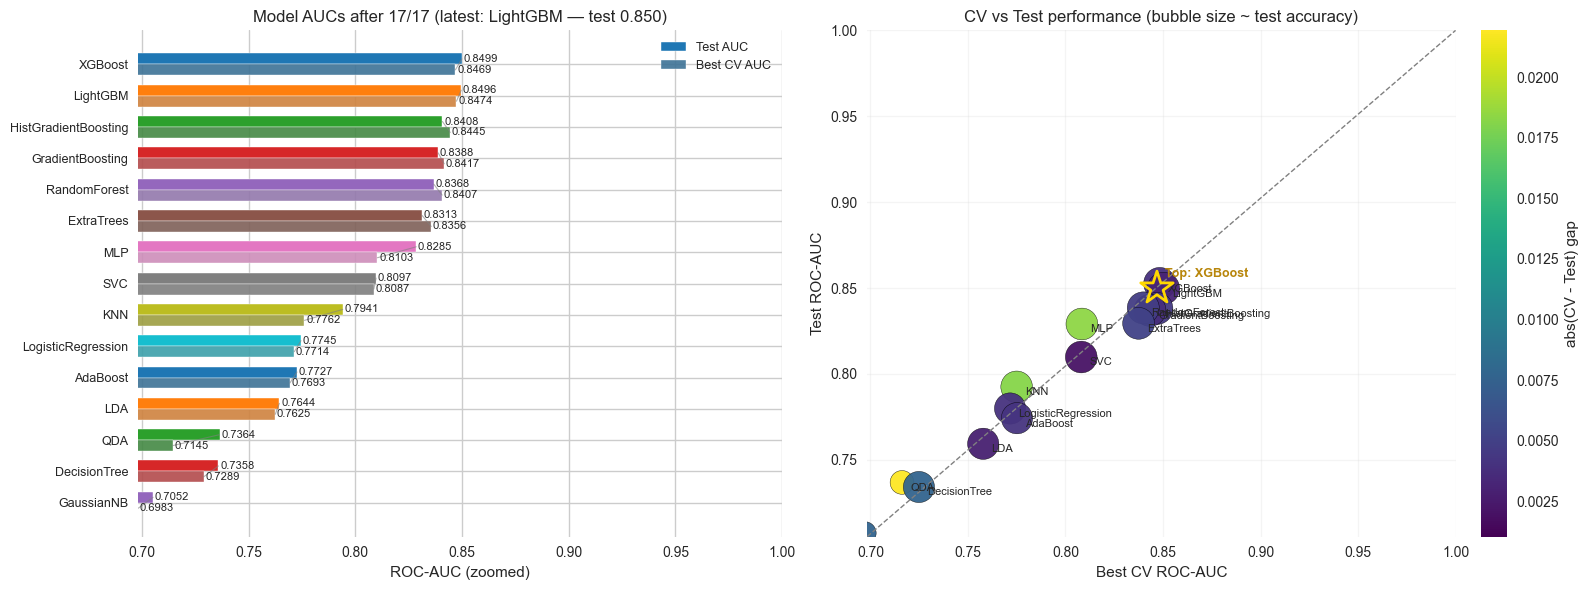

,rank_test_score,mean_test_score,std_test_score,params
6,1,0.847410,0.006922,"{'feature_fraction': 0.6873687420594126, 'lear..."
5,2,0.845831,0.007428,"{'feature_fraction': 0.7852444528883149, 'lear..."
8,3,0.845787,0.005990,"{'feature_fraction': 0.7542703315240835, 'lear..."
2,4,0.842488,0.007108,"{'feature_fraction': 0.6174250836504598, 'lear..."
0,5,0.841501,0.002170,"{'feature_fraction': 0.7123620356542087, 'lear..."
10,6,0.835440,0.009211,"{'feature_fraction': 0.884665661176, 'learning..."


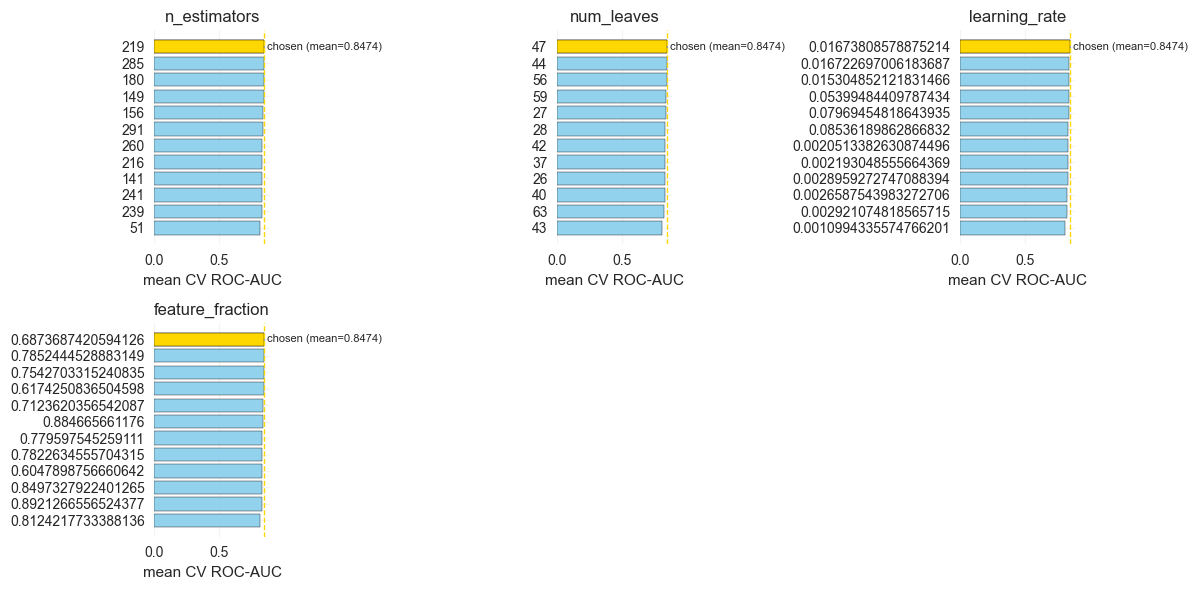

n_estimators: chosen=219 (mean CV 0.8474)
num_leaves: chosen=47 (mean CV 0.8474)
learning_rate: chosen=0.01673808578875214 (mean CV 0.8474)
feature_fraction: chosen=0.6873687420594126 (mean CV 0.8474)

Completed: LightGBM (17/17)
 best CV ROC-AUC: 0.8474
 test recall (macro): 0.3775
 test ROC-AUC: 0.8496  test accuracy: 0.6936

 Top feature importances (current model):


pl_tranmid          6793
planet_radius       5869
transit_duration    5682
st_tmag             5622
st_dist             5319
transit_depth       5260
orbital_period      4798
stellar_temp        4489
stellar_logg        4467
stellar_radius      4061
dtype: int32

,model,best_cv_score,test_auc,test_accuracy,best_params
0,XGBoost,0.846891,0.849939,0.692341,"{'colsample_bytree': 0.7123620356542087, 'lear..."
1,LightGBM,0.847410,0.849629,0.693639,"{'feature_fraction': 0.6873687420594126, 'lear..."
2,HistGradientBoosting,0.844482,0.840817,0.684119,"{'learning_rate': 0.029106359131330698, 'max_d..."
3,GradientBoosting,0.841671,0.838805,0.686716,"{'learning_rate': 0.037183641805732096, 'max_d..."
4,RandomForest,0.840681,0.836752,0.686716,"{'max_depth': None, 'max_features': 'sqrt', 'm..."
5,ExtraTrees,0.835568,0.831284,0.674600,"{'max_depth': None, 'max_features': 'sqrt', 'n..."
6,MLP,0.810346,0.828544,0.670705,"{'clf__learning_rate_init': 0.001, 'clf__hidde..."
7,SVC,0.808682,0.809727,0.666811,"{'clf__C': 2.950706670790534, 'clf__degree': 3..."
8,KNN,0.776169,0.794114,0.664647,"{'clf__n_neighbors': 16, 'clf__p': 1, 'clf__we..."
9,LogisticRegression,0.771389,0.774527,0.643012,"{'clf__C': 0.1767016940294795, 'clf__penalty':..."



Best model: XGBoost
CV ROC-AUC (best): 0.8468905413037427
Test ROC-AUC: 0.8499391885394862
Test recall (macro): 0.3769821040138417
Test f1 (macro): 0.41917914778137116
Test accuracy: 0.6923409779316313

Classification report on test set:
              precision    recall  f1-score   support

           0     0.5000    0.1583    0.2404       139
           1     0.5865    0.3805    0.4615       205
           2     0.5000    0.0345    0.0645        29
           3     0.5786    0.4513    0.5070       359
           4     0.6477    0.3257    0.4335       175
           5     0.7256    0.9117    0.8081      1404

    accuracy                         0.6923      2311
   macro avg     0.5897    0.3770    0.4192      2311
weighted avg     0.6681    0.6923    0.6587      2311


Top feature importances (best model):


st_dist             0.122557
st_tmag             0.110542
equilibrium_temp    0.101768
planet_radius       0.090216
pl_tranmid          0.088140
transit_depth       0.079933
orbital_period      0.078524
insolation          0.076509
transit_duration    0.069907
stellar_radius      0.066323
stellar_temp        0.059984
stellar_logg        0.055598
dtype: float32

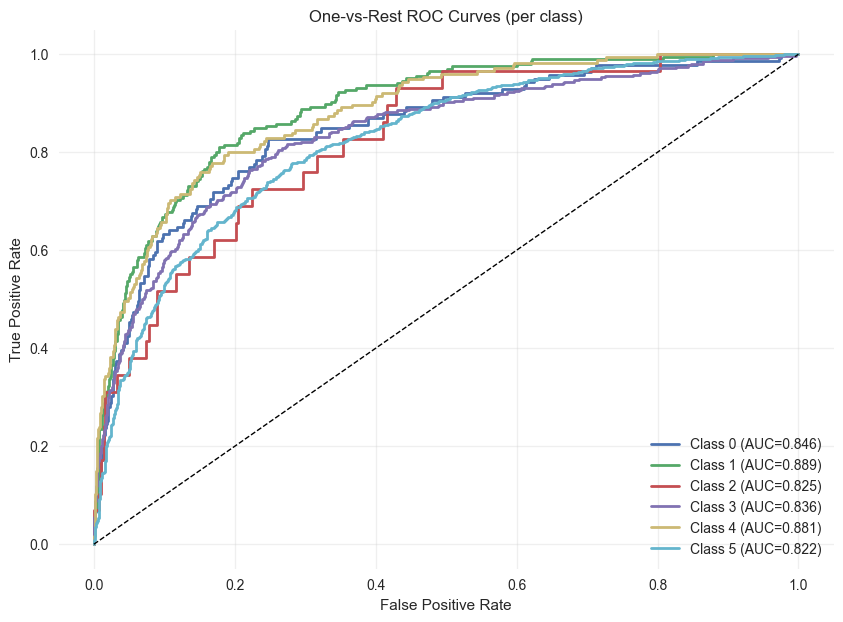

In [23]:
import traceback
from sklearn.pipeline import Pipeline
from scipy.stats import randint as sp_randint, uniform as sp_uniform, loguniform as sp_loguniform

X = X1
y = y1
X_train = X1_train
X_test = X1_test
y_train = y1_train
y_test = y1_test

# model structure + live "why this param" inspection
candidates = {
    "LogisticRegression": (
        Pipeline([("scaler", StandardScaler()), ("clf", LogisticRegression(solver="liblinear", max_iter=500, multi_class="ovr"))]),
        {
            "clf__C": sp_loguniform(1e-3, 1e3), 
            "clf__penalty": ["l2"],
        },
    ),
    "SVC": (
        Pipeline([("scaler", StandardScaler()), ("clf", SVC(probability=True))]),
        {
        "clf__C": sp_loguniform(1e-2, 1e2),
        "clf__gamma": ["scale", "auto", 0.001, 0.01, 0.1],  # ✅ no mixing with dist
        "clf__kernel": ["rbf", "linear", "poly"],
        "clf__degree": [2, 3],  
        },
    ),

    "KNN": (
        Pipeline([("scaler", StandardScaler()), ("clf", KNeighborsClassifier())]),
        {
            "clf__n_neighbors": sp_randint(1, 21),  
            "clf__weights": ["uniform", "distance"],
            "clf__p": [1, 2],
        },
    ),
    "GaussianNB": (GaussianNB(), {}),
    "LDA": (LinearDiscriminantAnalysis(), {}),
    "QDA": (QuadraticDiscriminantAnalysis(), {}),
    "DecisionTree": (
        DecisionTreeClassifier(random_state=42),
        {
            "max_depth": [3, 5, 10],  
            "min_samples_split": sp_randint(2, 11),
            "max_features": [None, "sqrt"],
        },
    ),
    "RandomForest": (
        RandomForestClassifier(random_state=42, n_jobs=-1),
        {
            "n_estimators": sp_randint(50, 301),  
            "max_depth": [None, 10, 20],
            "min_samples_split": sp_randint(2, 11),
            "max_features": ["sqrt", None],
        },
    ),
    "ExtraTrees": (
        ExtraTreesClassifier(random_state=42, n_jobs=-1),
        {
            "n_estimators": sp_randint(50, 301),
            "max_depth": [None, 10, 20],
            "max_features": ["sqrt", None],
        },
    ),
    "GradientBoosting": (
        GradientBoostingClassifier(random_state=42),
        {
            "n_estimators": sp_randint(50, 201),
            "learning_rate": sp_loguniform(1e-3, 1e-1),
            "max_depth": sp_randint(3, 8),
            "subsample": sp_uniform(0.6, 0.3),
        },
    ),
    "HistGradientBoosting": (
        HistGradientBoostingClassifier(random_state=42),
        {
            "max_iter": sp_randint(100, 201),
            "learning_rate": sp_loguniform(1e-3, 1e-1),
            "max_depth": [None, 3, 5],
        },
    ),
    "AdaBoost": (
        AdaBoostClassifier(random_state=42),
        {
            "n_estimators": sp_randint(50, 201),
            "learning_rate": sp_uniform(0.01, 1.0),
        },
    ),
    "MLP": (
        Pipeline([("scaler", StandardScaler()), ("clf", MLPClassifier(max_iter=500, random_state=42))]),
        {
            "clf__hidden_layer_sizes": [(50,), (100,), (50, 50)],
            "clf__alpha": [1e-5, 1e-4, 1e-3],
            "clf__learning_rate_init": [1e-4, 1e-3],
        },
    ),
    "SGD": (
        Pipeline([("scaler", StandardScaler()), ("clf", SGDClassifier(loss="log_loss", max_iter=2000, tol=1e-3, random_state=42))]),
        {
            "clf__alpha": sp_loguniform(1e-5, 1e-2),
            "clf__penalty": ["l2", "l1", "elasticnet", "none"],
            "clf__l1_ratio": sp_uniform(0.0, 1.0),
        },
    ),
    "CalibratedSVC": (
        Pipeline([("scaler", StandardScaler()), ("base", SVC(probability=False))]),
        {
            "base__C": sp_loguniform(1e-2, 1e1),
            "base__kernel": ["linear", "rbf"],
            "base__gamma": ["scale", "auto", sp_loguniform(1e-3, 1e-2)],
        },
    ),
}

# optional: XGBoost / LightGBM
try:
    candidates["XGBoost"] = (
        XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42, n_jobs=-1),
        {
            "n_estimators": sp_randint(50, 301),
            "max_depth": sp_randint(3, 8),
            "learning_rate": sp_loguniform(1e-3, 1e-1), 
            "colsample_bytree": sp_uniform(0.6, 0.3),
        },
    )
except Exception:
    pass

try:
    candidates["LightGBM"] = (
        LGBMClassifier(random_state=42, n_jobs=-1),
        {
            "n_estimators": sp_randint(50, 301),
            "num_leaves": sp_randint(20, 64),
            "learning_rate": sp_loguniform(1e-3, 1e-1),
            "feature_fraction": sp_uniform(0.6, 0.3),
        },
    )
except Exception:
    pass

results = []
n_iter = 12
cv = 3
scoring = "roc_auc_ovr"   # tells sklearn it's multiclass
random_state = 42

def extract_inner(est):
    if isinstance(est, Pipeline):
        return est.named_steps[list(est.named_steps)[-1]]
    return est


sns.set_style("whitegrid")
plt.ioff()
rng = np.random.RandomState(random_state)

for i, (name, (estimator, param_dist)) in enumerate(candidates.items(), 1):
    if param_dist:
        try:
            max_choices = max(1, sum(len(v) for v in param_dist.values()))
        except Exception:
            max_choices = n_iter
    else:
        max_choices = 1

    rs = RandomizedSearchCV(
        estimator,
        param_distributions=param_dist,
        n_iter=min(n_iter, max_choices),
        scoring=scoring,   #now using multiclass-safe scorer
        cv=cv,
        n_jobs=-1,
        verbose=0,
        random_state=random_state,
        refit=True,
    )

    rs.error_score = "raise"
    try:
        rs.fit(X_train, y_train)
    except Exception as e:
        print(f"RandomizedSearchCV failed for {name}: {e}")
        traceback.print_exc()
        continue

    best = rs.best_estimator_
    y_pred = best.predict(X_test)

    # ✅ multiclass ROC-AUC handling
    if hasattr(best, "predict_proba"):
        y_proba = best.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_proba, multi_class="ovr")
    elif hasattr(best, "decision_function"):
        y_scores = best.decision_function(X_test)
        test_auc = roc_auc_score(y_test, y_scores, multi_class="ovr")
    else:
        y_proba = None
        test_auc = accuracy_score(y_test, y_pred)  # fallback

    test_acc = accuracy_score(y_test, y_pred)

    results.append(
        {
            "model": name,
            "best_cv_score": rs.best_score_,
            "best_params": rs.best_params_,
            "test_auc": test_auc,
            "test_accuracy": test_acc,
            "estimator": best,
            "cv_std": np.mean(rs.cv_results_["std_test_score"]) if hasattr(rs, "cv_results_") else 0.0,
        }
    )

    cur_df = pd.DataFrame(results).sort_values("test_auc", ascending=False).reset_index(drop=True)

    # nicer live plot (main comparison)
    clear_output(wait=True)
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    palette = sns.color_palette("tab10", n_colors=len(cur_df))
    axes[0].set_title(f"Model AUCs after {i}/{len(candidates)} (latest: {name} — test {test_auc:.3f})")
    indices = np.arange(len(cur_df))
    height = 0.35

    axes[0].barh(indices - height/2, cur_df["test_auc"], height=height, color=palette, label="Test AUC")
    axes[0].barh(indices + height/2, cur_df["best_cv_score"], height=height, color=[sns.desaturate(c, 0.6) for c in palette], alpha=0.9, label="Best CV AUC")
    axes[0].set_yticks(indices)
    axes[0].set_yticklabels(cur_df["model"], fontsize=9)
    axes[0].invert_yaxis()
    axes[0].set_xlim(min(cur_df["test_auc"].min(), cur_df["best_cv_score"].min()), 1.00)
    axes[0].set_xlabel("ROC-AUC (zoomed)")
    axes[0].legend(fontsize=9)
    for idx in range(len(cur_df)):
        axes[0].text(cur_df.loc[idx, "test_auc"] + 0.0008, idx - height/2, f"{cur_df.loc[idx,'test_auc']:.4f}", va="center", fontsize=8)
        axes[0].text(cur_df.loc[idx, "best_cv_score"] + 0.0008, idx + height/2, f"{cur_df.loc[idx,'best_cv_score']:.4f}", va="center", fontsize=8)
        axes[0].plot([cur_df.loc[idx, "best_cv_score"], cur_df.loc[idx, "test_auc"]], [idx + height/2, idx - height/2], color="gray", linewidth=0.8, alpha=0.6)

    # scatter CV vs Test (bubble = accuracy)
    axes[1].set_title("CV vs Test performance (bubble size ~ test accuracy)")
    x = cur_df["best_cv_score"].values
    y = cur_df["test_auc"].values
    jitter_scale = 0.0025
    x_j = x + rng.normal(scale=jitter_scale, size=len(x))
    y_j = y + rng.normal(scale=jitter_scale, size=len(y))
    sizes = 120 + 600 * cur_df["test_accuracy"].values
    gap = np.abs(cur_df["best_cv_score"] - cur_df["test_auc"]).values
    cmap = plt.cm.get_cmap("viridis")
    colors = cmap(np.clip(gap / (gap.max() + 1e-6), 0, 1))

    sc = axes[1].scatter(x_j, y_j, s=sizes, c=colors, edgecolor="k", alpha=0.95)
    axes[1].plot([min(x), 1.0], [min(y), 1.0], ls="--", color="gray", linewidth=1)
    for j, row in cur_df.iterrows():
        axes[1].annotate(row["model"], (x_j[j], y_j[j]), xytext=(6, -6), textcoords="offset points", fontsize=8)
    if not cur_df.empty:
        top = cur_df.iloc[0]
        axes[1].scatter([top["best_cv_score"]], [top["test_auc"]], s=600, facecolors="none", edgecolors="gold", linewidths=2, marker="*", zorder=10)
        axes[1].annotate(f"Top: {top['model']}", (top["best_cv_score"], top["test_auc"]), xytext=(6, 8), textcoords="offset points", fontsize=9, weight="bold", color="darkgoldenrod")

    axes[1].set_xlabel("Best CV ROC-AUC")
    axes[1].set_ylabel("Test ROC-AUC")
    axes[1].set_xlim(min(x), 1.00)
    axes[1].set_ylim(min(y), 1.00)
    axes[1].grid(alpha=0.2)

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=gap.min(), vmax=gap.max()))
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=axes[1], fraction=0.046, pad=0.04)
    cbar.set_label("abs(CV - Test) gap")

    plt.tight_layout()
    display(fig)
    plt.close(fig)

    # Show the "self-learning" details: what the search evaluated and why it was chosen
    df_cv = pd.DataFrame(rs.cv_results_)
    display(df_cv.sort_values("rank_test_score").head(6)[["rank_test_score", "mean_test_score", "std_test_score", "params"]])

    # plot aggregated effect for each hyperparameter we searched
    if param_dist:
        # small grid of plots (one per hyperparameter)
        keys = list(param_dist.keys())
        n_plots = len(keys)
        ncols = min(3, n_plots) if n_plots else 1
        nrows = int(np.ceil(n_plots / ncols)) if n_plots else 1
        fig2, axs2 = plt.subplots(nrows, ncols, figsize=(4 * ncols, 3 * max(1, nrows)))
        axs2 = np.array(axs2).reshape(-1) if n_plots > 1 else [axs2]  # flat list
        for ax_idx, p in enumerate(keys):
            axp = axs2[ax_idx]
            col = f"param_{p}"
            if col in df_cv:
                # aggregate mean score per value
                agg = df_cv.groupby(col)["mean_test_score"].agg(["mean", "std"]).sort_values("mean", ascending=True)
                # convert index to string for plotting clarity
                agg_idx = agg.index.astype(str)
                axp.barh(agg_idx, agg["mean"], xerr=agg["std"], color="skyblue", edgecolor="k", alpha=0.9)
                axp.set_title(p)
                axp.set_xlabel("mean CV ROC-AUC")
                # annotate chosen
                chosen_val = rs.best_params_.get(p, None)
                if chosen_val is not None:
                    axp.axvline(rs.best_score_, color="gold", linestyle="--", linewidth=1)
                    # try to highlight chosen entry
                    try:
                        match_mask = agg.index.astype(str) == str(chosen_val)
                        if match_mask.any():
                            matched_idx = agg.index[match_mask][0]
                            chosen_mean = agg.loc[matched_idx, "mean"]
                            axp.barh(str(matched_idx), chosen_mean, color="gold", edgecolor="k")
                            axp.text(chosen_mean + 1e-4, list(match_mask).index(True), f" chosen (mean={chosen_mean:.4f})", va="center", fontsize=8)
                    except Exception:
                        pass
            else:
                axp.text(0.5, 0.5, "no data", ha="center")
            axp.grid(alpha=0.2)
        # hide unused axes
        for k in range(len(keys), len(axs2)):
            axs2[k].axis("off")
        plt.tight_layout()
        display(fig2)
        plt.close(fig2)

        # textual rationale per hyperparameter
        for p in keys:
            col = f"param_{p}"
            if col in df_cv:
                best_val = rs.best_params_.get(p, None)
                # mean score of chosen val
                sel_mean = df_cv[df_cv[col] == best_val]["mean_test_score"].mean() if best_val is not None else None
                print(f"{p}: chosen={best_val} (mean CV {sel_mean:.4f})" if sel_mean is not None else f"{p}: chosen={best_val}")
            else:
                print(f"{p}: (no per-value breakdown available)")

    # short model summary and feature importances
    print(f"\nCompleted: {name} ({i}/{len(candidates)})")
    print(" best CV ROC-AUC:", f"{rs.best_score_:.4f}")
    print(" test recall (macro):", f"{recall_score(y_test, y_pred, average='macro'):.4f}")
    print(" test ROC-AUC:", f"{test_auc:.4f}", " test accuracy:", f"{test_acc:.4f}")

    inner = extract_inner(best)
    if hasattr(inner, "feature_importances_"):
        importances = inner.feature_importances_
        feat_series = pd.Series(importances, index=X.columns).sort_values(ascending=False)
        print("\n Top feature importances (current model):")
        display(feat_series.head(10))

    time.sleep(0.15)

results_df = pd.DataFrame(results).sort_values("test_auc", ascending=False).reset_index(drop=True)
display(results_df[["model", "best_cv_score", "test_auc", "test_accuracy", "best_params"]])

best_row = results_df.loc[0]
best_model = best_row["estimator"]
print(f"\nBest model: {best_row['model']}")
print("CV ROC-AUC (best):", best_row["best_cv_score"])
print("Test ROC-AUC:", best_row["test_auc"])
print("Test recall (macro):", recall_score(y_test, best_model.predict(X_test), average="macro"))
print("Test f1 (macro):", f1_score(y_test, best_model.predict(X_test), average="macro"))
print("Test accuracy:", best_row["test_accuracy"])

print("\nClassification report on test set:")
print(classification_report(y_test, best_model.predict(X_test), digits=4))

# Feature importances if available
inner = extract_inner(best_model)
if hasattr(inner, "feature_importances_"):
    importances = inner.feature_importances_
    feat_series = pd.Series(importances, index=X.columns).sort_values(ascending=False)
    print("\nTop feature importances (best model):")
    display(feat_series.head(15))

# === Per-class ROC curves for best model ===
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

if hasattr(best_model, "predict_proba"):
    y_proba = best_model.predict_proba(X_test)
else:
    y_proba = best_model.decision_function(X_test)

plt.figure(figsize=(10, 7))
for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Class {cls} (AUC={roc_auc:.3f})")

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC Curves (per class)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

best_estimator = best_model
results_summary = results_df


In [24]:
# Save the best model and results summary
import joblib
joblib.dump(best_estimator, 'best_model_tess.pkl')
results_summary.to_csv('model_results_summary_tess.csv', index=False)

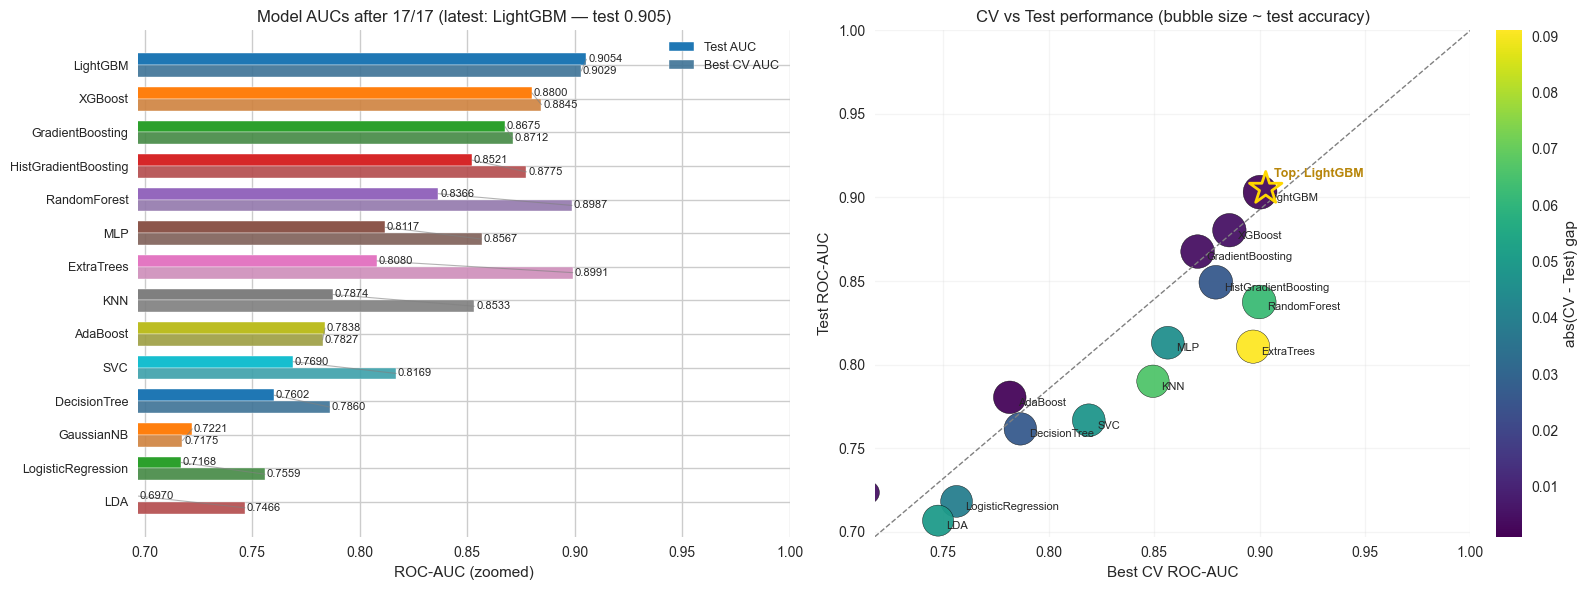

,rank_test_score,mean_test_score,std_test_score,params
0,1,0.902933,0.016462,"{'feature_fraction': 0.7123620356542087, 'lear..."
2,2,0.894188,0.025949,"{'feature_fraction': 0.6174250836504598, 'lear..."
6,3,0.893030,0.023776,"{'feature_fraction': 0.6873687420594126, 'lear..."
8,4,0.891521,0.025519,"{'feature_fraction': 0.7542703315240835, 'lear..."
10,5,0.891036,0.017246,"{'feature_fraction': 0.884665661176, 'learning..."
5,6,0.889080,0.028314,"{'feature_fraction': 0.7852444528883149, 'lear..."


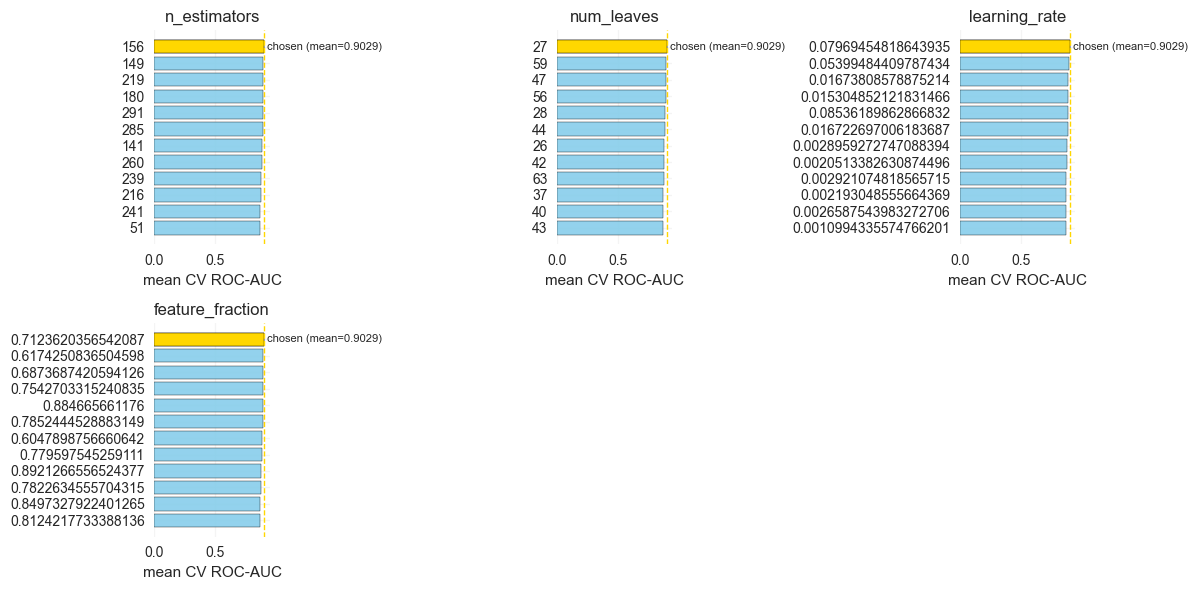

n_estimators: chosen=156 (mean CV 0.9029)
num_leaves: chosen=27 (mean CV 0.9029)
learning_rate: chosen=0.07969454818643935 (mean CV 0.9029)
feature_fraction: chosen=0.7123620356542087 (mean CV 0.9029)

Completed: LightGBM (17/17)
 best CV ROC-AUC: 0.9029
 test recall (macro): 0.6225
 test ROC-AUC: 0.9054  test accuracy: 0.7879

 Top feature importances (current model):


orbital_period      2386
transit_duration    2144
transit_depth       1776
stellar_radius      1729
planet_radius       1484
stellar_temp        1398
planet_radiuJ       1027
stellar_mass         914
stellar_logg         888
st_met               788
dtype: int32

,model,best_cv_score,test_auc,test_accuracy,best_params
0,LightGBM,0.902933,0.905372,0.787854,"{'feature_fraction': 0.7123620356542087, 'lear..."
1,XGBoost,0.884484,0.880027,0.767887,"{'colsample_bytree': 0.6174250836504598, 'lear..."
2,GradientBoosting,0.871176,0.867480,0.775374,"{'learning_rate': 0.037183641805732096, 'max_d..."
3,HistGradientBoosting,0.877493,0.852101,0.780366,"{'learning_rate': 0.029106359131330698, 'max_d..."
4,RandomForest,0.898682,0.836556,0.782030,"{'max_depth': None, 'max_features': 'sqrt', 'm..."
5,MLP,0.856676,0.811657,0.727953,"{'clf__learning_rate_init': 0.001, 'clf__hidde..."
6,ExtraTrees,0.899065,0.808020,0.754576,"{'max_depth': 20, 'max_features': None, 'n_est..."
7,KNN,0.853250,0.787372,0.708819,"{'clf__n_neighbors': 15, 'clf__p': 1, 'clf__we..."
8,AdaBoost,0.782667,0.783833,0.717970,"{'learning_rate': 0.1934347898661638, 'n_estim..."
9,SVC,0.816885,0.769010,0.727121,"{'clf__C': 17.12337597316399, 'clf__degree': 2..."



Best model: LightGBM
CV ROC-AUC (best): 0.9029332742806574
Test ROC-AUC: 0.9053721523657308
[LightGBM] [Warning] feature_fraction is set=0.7123620356542087, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7123620356542087
Test recall (macro): 0.62246250597555
[LightGBM] [Warning] feature_fraction is set=0.7123620356542087, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7123620356542087
Test f1 (macro): 0.6820574709296905
Test accuracy: 0.7878535773710482

Classification report on test set:
[LightGBM] [Warning] feature_fraction is set=0.7123620356542087, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7123620356542087
              precision    recall  f1-score   support

           0     0.7103    0.6845    0.6972       412
           1     0.8223    0.8719    0.8464       695
           2     0.8636    0.6477    0.7403        88
           3     1.0000    0.2857    0.4444         7

    accuracy                 

orbital_period      2386
transit_duration    2144
transit_depth       1776
stellar_radius      1729
planet_radius       1484
stellar_temp        1398
planet_radiuJ       1027
stellar_mass         914
stellar_logg         888
st_met               788
inclination          492
equilibrium_temp     398
insolation           305
pl_orbeccen           77
pl_masse              35
dtype: int32

[LightGBM] [Warning] feature_fraction is set=0.7123620356542087, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7123620356542087


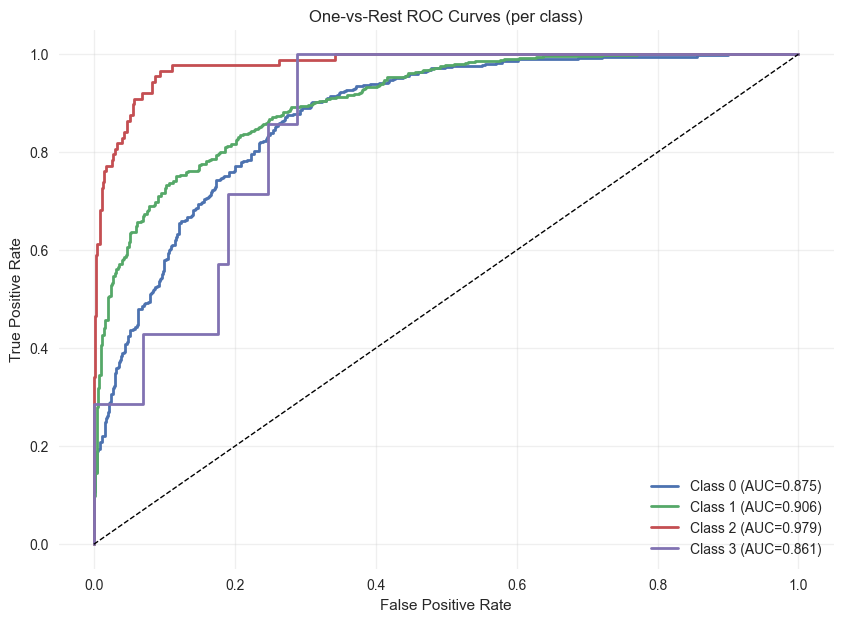

In [25]:
import traceback
from sklearn.pipeline import Pipeline
from scipy.stats import randint as sp_randint, uniform as sp_uniform, loguniform as sp_loguniform

X = X2
y = y2
X_train = X2_train
X_test = X2_test
y_train = y2_train
y_test = y2_test


# model structure + live "why this param" inspection
candidates = {
    "LogisticRegression": (
        Pipeline([("scaler", StandardScaler()), ("clf", LogisticRegression(solver="liblinear", max_iter=500, multi_class="ovr"))]),
        {
            "clf__C": sp_loguniform(1e-3, 1e3), 
            "clf__penalty": ["l2"],
        },
    ),
    "SVC": (
        Pipeline([("scaler", StandardScaler()), ("clf", SVC(probability=True))]),
        {
        "clf__C": sp_loguniform(1e-2, 1e2),
        "clf__gamma": ["scale", "auto", 0.001, 0.01, 0.1],  # ✅ no mixing with dist
        "clf__kernel": ["rbf", "linear", "poly"],
        "clf__degree": [2, 3],  
        },
    ),

    "KNN": (
        Pipeline([("scaler", StandardScaler()), ("clf", KNeighborsClassifier())]),
        {
            "clf__n_neighbors": sp_randint(1, 21),  
            "clf__weights": ["uniform", "distance"],
            "clf__p": [1, 2],
        },
    ),
    "GaussianNB": (GaussianNB(), {}),
    "LDA": (LinearDiscriminantAnalysis(), {}),
    "QDA": (QuadraticDiscriminantAnalysis(), {}),
    "DecisionTree": (
        DecisionTreeClassifier(random_state=42),
        {
            "max_depth": [3, 5, 10],  
            "min_samples_split": sp_randint(2, 11),
            "max_features": [None, "sqrt"],
        },
    ),
    "RandomForest": (
        RandomForestClassifier(random_state=42, n_jobs=-1),
        {
            "n_estimators": sp_randint(50, 301),  
            "max_depth": [None, 10, 20],
            "min_samples_split": sp_randint(2, 11),
            "max_features": ["sqrt", None],
        },
    ),
    "ExtraTrees": (
        ExtraTreesClassifier(random_state=42, n_jobs=-1),
        {
            "n_estimators": sp_randint(50, 301),
            "max_depth": [None, 10, 20],
            "max_features": ["sqrt", None],
        },
    ),
    "GradientBoosting": (
        GradientBoostingClassifier(random_state=42),
        {
            "n_estimators": sp_randint(50, 201),
            "learning_rate": sp_loguniform(1e-3, 1e-1),
            "max_depth": sp_randint(3, 8),
            "subsample": sp_uniform(0.6, 0.3),
        },
    ),
    "HistGradientBoosting": (
        HistGradientBoostingClassifier(random_state=42),
        {
            "max_iter": sp_randint(100, 201),
            "learning_rate": sp_loguniform(1e-3, 1e-1),
            "max_depth": [None, 3, 5],
        },
    ),
    "AdaBoost": (
        AdaBoostClassifier(random_state=42),
        {
            "n_estimators": sp_randint(50, 201),
            "learning_rate": sp_uniform(0.01, 1.0),
        },
    ),
    "MLP": (
        Pipeline([("scaler", StandardScaler()), ("clf", MLPClassifier(max_iter=500, random_state=42))]),
        {
            "clf__hidden_layer_sizes": [(50,), (100,), (50, 50)],
            "clf__alpha": [1e-5, 1e-4, 1e-3],
            "clf__learning_rate_init": [1e-4, 1e-3],
        },
    ),
    "SGD": (
        Pipeline([("scaler", StandardScaler()), ("clf", SGDClassifier(loss="log_loss", max_iter=2000, tol=1e-3, random_state=42))]),
        {
            "clf__alpha": sp_loguniform(1e-5, 1e-2),
            "clf__penalty": ["l2", "l1", "elasticnet", "none"],
            "clf__l1_ratio": sp_uniform(0.0, 1.0),
        },
    ),
    "CalibratedSVC": (
        Pipeline([("scaler", StandardScaler()), ("base", SVC(probability=False))]),
        {
            "base__C": sp_loguniform(1e-2, 1e1),
            "base__kernel": ["linear", "rbf"],
            "base__gamma": ["scale", "auto", sp_loguniform(1e-3, 1e-2)],
        },
    ),
}

# optional: XGBoost / LightGBM
try:
    candidates["XGBoost"] = (
        XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42, n_jobs=-1),
        {
            "n_estimators": sp_randint(50, 301),
            "max_depth": sp_randint(3, 8),
            "learning_rate": sp_loguniform(1e-3, 1e-1), 
            "colsample_bytree": sp_uniform(0.6, 0.3),
        },
    )
except Exception:
    pass

try:
    candidates["LightGBM"] = (
        LGBMClassifier(random_state=42, n_jobs=-1),
        {
            "n_estimators": sp_randint(50, 301),
            "num_leaves": sp_randint(20, 64),
            "learning_rate": sp_loguniform(1e-3, 1e-1),
            "feature_fraction": sp_uniform(0.6, 0.3),
        },
    )
except Exception:
    pass

results = []
n_iter = 12
cv = 3
scoring = "roc_auc_ovr"   # 👈 IMPORTANT: tells sklearn it's multiclass
random_state = 42

def extract_inner(est):
    if isinstance(est, Pipeline):
        return est.named_steps[list(est.named_steps)[-1]]
    return est


sns.set_style("whitegrid")
plt.ioff()
rng = np.random.RandomState(random_state)

for i, (name, (estimator, param_dist)) in enumerate(candidates.items(), 1):
    if param_dist:
        try:
            max_choices = max(1, sum(len(v) for v in param_dist.values()))
        except Exception:
            max_choices = n_iter
    else:
        max_choices = 1

    rs = RandomizedSearchCV(
        estimator,
        param_distributions=param_dist,
        n_iter=min(n_iter, max_choices),
        scoring=scoring,   # 👈 now using multiclass-safe scorer
        cv=cv,
        n_jobs=-1,
        verbose=0,
        random_state=random_state,
        refit=True,
    )

    rs.error_score = "raise"
    try:
        rs.fit(X_train, y_train)
    except Exception as e:
        print(f"RandomizedSearchCV failed for {name}: {e}")
        traceback.print_exc()
        continue

    best = rs.best_estimator_
    y_pred = best.predict(X_test)

    # ✅ multiclass ROC-AUC handling
    if hasattr(best, "predict_proba"):
        y_proba = best.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_proba, multi_class="ovr")
    elif hasattr(best, "decision_function"):
        y_scores = best.decision_function(X_test)
        test_auc = roc_auc_score(y_test, y_scores, multi_class="ovr")
    else:
        y_proba = None
        test_auc = accuracy_score(y_test, y_pred)  # fallback

    test_acc = accuracy_score(y_test, y_pred)

    results.append(
        {
            "model": name,
            "best_cv_score": rs.best_score_,
            "best_params": rs.best_params_,
            "test_auc": test_auc,
            "test_accuracy": test_acc,
            "estimator": best,
            "cv_std": np.mean(rs.cv_results_["std_test_score"]) if hasattr(rs, "cv_results_") else 0.0,
        }
    )

    cur_df = pd.DataFrame(results).sort_values("test_auc", ascending=False).reset_index(drop=True)

    # nicer live plot (main comparison)
    clear_output(wait=True)
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    palette = sns.color_palette("tab10", n_colors=len(cur_df))
    axes[0].set_title(f"Model AUCs after {i}/{len(candidates)} (latest: {name} — test {test_auc:.3f})")
    indices = np.arange(len(cur_df))
    height = 0.35

    axes[0].barh(indices - height/2, cur_df["test_auc"], height=height, color=palette, label="Test AUC")
    axes[0].barh(indices + height/2, cur_df["best_cv_score"], height=height, color=[sns.desaturate(c, 0.6) for c in palette], alpha=0.9, label="Best CV AUC")
    axes[0].set_yticks(indices)
    axes[0].set_yticklabels(cur_df["model"], fontsize=9)
    axes[0].invert_yaxis()
    axes[0].set_xlim(min(cur_df["test_auc"].min(), cur_df["best_cv_score"].min()), 1.00)
    axes[0].set_xlabel("ROC-AUC (zoomed)")
    axes[0].legend(fontsize=9)
    for idx in range(len(cur_df)):
        axes[0].text(cur_df.loc[idx, "test_auc"] + 0.0008, idx - height/2, f"{cur_df.loc[idx,'test_auc']:.4f}", va="center", fontsize=8)
        axes[0].text(cur_df.loc[idx, "best_cv_score"] + 0.0008, idx + height/2, f"{cur_df.loc[idx,'best_cv_score']:.4f}", va="center", fontsize=8)
        axes[0].plot([cur_df.loc[idx, "best_cv_score"], cur_df.loc[idx, "test_auc"]], [idx + height/2, idx - height/2], color="gray", linewidth=0.8, alpha=0.6)

    # scatter CV vs Test (bubble = accuracy)
    axes[1].set_title("CV vs Test performance (bubble size ~ test accuracy)")
    x = cur_df["best_cv_score"].values
    y = cur_df["test_auc"].values
    jitter_scale = 0.0025
    x_j = x + rng.normal(scale=jitter_scale, size=len(x))
    y_j = y + rng.normal(scale=jitter_scale, size=len(y))
    sizes = 120 + 600 * cur_df["test_accuracy"].values
    gap = np.abs(cur_df["best_cv_score"] - cur_df["test_auc"]).values
    cmap = plt.cm.get_cmap("viridis")
    colors = cmap(np.clip(gap / (gap.max() + 1e-6), 0, 1))

    sc = axes[1].scatter(x_j, y_j, s=sizes, c=colors, edgecolor="k", alpha=0.95)
    axes[1].plot([min(x), 1.0], [min(y), 1.0], ls="--", color="gray", linewidth=1)
    for j, row in cur_df.iterrows():
        axes[1].annotate(row["model"], (x_j[j], y_j[j]), xytext=(6, -6), textcoords="offset points", fontsize=8)
    if not cur_df.empty:
        top = cur_df.iloc[0]
        axes[1].scatter([top["best_cv_score"]], [top["test_auc"]], s=600, facecolors="none", edgecolors="gold", linewidths=2, marker="*", zorder=10)
        axes[1].annotate(f"Top: {top['model']}", (top["best_cv_score"], top["test_auc"]), xytext=(6, 8), textcoords="offset points", fontsize=9, weight="bold", color="darkgoldenrod")

    axes[1].set_xlabel("Best CV ROC-AUC")
    axes[1].set_ylabel("Test ROC-AUC")
    axes[1].set_xlim(min(x), 1.00)
    axes[1].set_ylim(min(y), 1.00)
    axes[1].grid(alpha=0.2)

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=gap.min(), vmax=gap.max()))
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=axes[1], fraction=0.046, pad=0.04)
    cbar.set_label("abs(CV - Test) gap")

    plt.tight_layout()
    display(fig)
    plt.close(fig)

    # Show the "self-learning" details: what the search evaluated and why it was chosen
    df_cv = pd.DataFrame(rs.cv_results_)
    display(df_cv.sort_values("rank_test_score").head(6)[["rank_test_score", "mean_test_score", "std_test_score", "params"]])

    # plot aggregated effect for each hyperparameter we searched
    if param_dist:
        # small grid of plots (one per hyperparameter)
        keys = list(param_dist.keys())
        n_plots = len(keys)
        ncols = min(3, n_plots) if n_plots else 1
        nrows = int(np.ceil(n_plots / ncols)) if n_plots else 1
        fig2, axs2 = plt.subplots(nrows, ncols, figsize=(4 * ncols, 3 * max(1, nrows)))
        axs2 = np.array(axs2).reshape(-1) if n_plots > 1 else [axs2]  # flat list
        for ax_idx, p in enumerate(keys):
            axp = axs2[ax_idx]
            col = f"param_{p}"
            if col in df_cv:
                # aggregate mean score per value
                agg = df_cv.groupby(col)["mean_test_score"].agg(["mean", "std"]).sort_values("mean", ascending=True)
                # convert index to string for plotting clarity
                agg_idx = agg.index.astype(str)
                axp.barh(agg_idx, agg["mean"], xerr=agg["std"], color="skyblue", edgecolor="k", alpha=0.9)
                axp.set_title(p)
                axp.set_xlabel("mean CV ROC-AUC")
                # annotate chosen
                chosen_val = rs.best_params_.get(p, None)
                if chosen_val is not None:
                    axp.axvline(rs.best_score_, color="gold", linestyle="--", linewidth=1)
                    # try to highlight chosen entry
                    try:
                        match_mask = agg.index.astype(str) == str(chosen_val)
                        if match_mask.any():
                            matched_idx = agg.index[match_mask][0]
                            chosen_mean = agg.loc[matched_idx, "mean"]
                            axp.barh(str(matched_idx), chosen_mean, color="gold", edgecolor="k")
                            axp.text(chosen_mean + 1e-4, list(match_mask).index(True), f" chosen (mean={chosen_mean:.4f})", va="center", fontsize=8)
                    except Exception:
                        pass
            else:
                axp.text(0.5, 0.5, "no data", ha="center")
            axp.grid(alpha=0.2)
        # hide unused axes
        for k in range(len(keys), len(axs2)):
            axs2[k].axis("off")
        plt.tight_layout()
        display(fig2)
        plt.close(fig2)

        # textual rationale per hyperparameter
        for p in keys:
            col = f"param_{p}"
            if col in df_cv:
                best_val = rs.best_params_.get(p, None)
                # mean score of chosen val
                sel_mean = df_cv[df_cv[col] == best_val]["mean_test_score"].mean() if best_val is not None else None
                print(f"{p}: chosen={best_val} (mean CV {sel_mean:.4f})" if sel_mean is not None else f"{p}: chosen={best_val}")
            else:
                print(f"{p}: (no per-value breakdown available)")

    # short model summary and feature importances
    print(f"\nCompleted: {name} ({i}/{len(candidates)})")
    print(" best CV ROC-AUC:", f"{rs.best_score_:.4f}")
    print(" test recall (macro):", f"{recall_score(y_test, y_pred, average='macro'):.4f}")
    print(" test ROC-AUC:", f"{test_auc:.4f}", " test accuracy:", f"{test_acc:.4f}")

    inner = extract_inner(best)
    if hasattr(inner, "feature_importances_"):
        importances = inner.feature_importances_
        feat_series = pd.Series(importances, index=X.columns).sort_values(ascending=False)
        print("\n Top feature importances (current model):")
        display(feat_series.head(10))

    time.sleep(0.15)

results_df = pd.DataFrame(results).sort_values("test_auc", ascending=False).reset_index(drop=True)
display(results_df[["model", "best_cv_score", "test_auc", "test_accuracy", "best_params"]])

best_row = results_df.loc[0]
best_model = best_row["estimator"]
print(f"\nBest model: {best_row['model']}")
print("CV ROC-AUC (best):", best_row["best_cv_score"])
print("Test ROC-AUC:", best_row["test_auc"])
print("Test recall (macro):", recall_score(y_test, best_model.predict(X_test), average="macro"))
print("Test f1 (macro):", f1_score(y_test, best_model.predict(X_test), average="macro"))
print("Test accuracy:", best_row["test_accuracy"])

print("\nClassification report on test set:")
print(classification_report(y_test, best_model.predict(X_test), digits=4))

# Feature importances if available
inner = extract_inner(best_model)
if hasattr(inner, "feature_importances_"):
    importances = inner.feature_importances_
    feat_series = pd.Series(importances, index=X.columns).sort_values(ascending=False)
    print("\nTop feature importances (best model):")
    display(feat_series.head(15))

# === Per-class ROC curves for best model ===
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

if hasattr(best_model, "predict_proba"):
    y_proba = best_model.predict_proba(X_test)
else:
    y_proba = best_model.decision_function(X_test)

plt.figure(figsize=(10, 7))
for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Class {cls} (AUC={roc_auc:.3f})")

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC Curves (per class)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

best_estimator = best_model
results_summary = results_df



In [26]:
# Save the best model and results summary
import joblib
joblib.dump(best_estimator, 'best_model_k2.pkl')
results_summary.to_csv('model_results_summary_k2.csv', index=False)

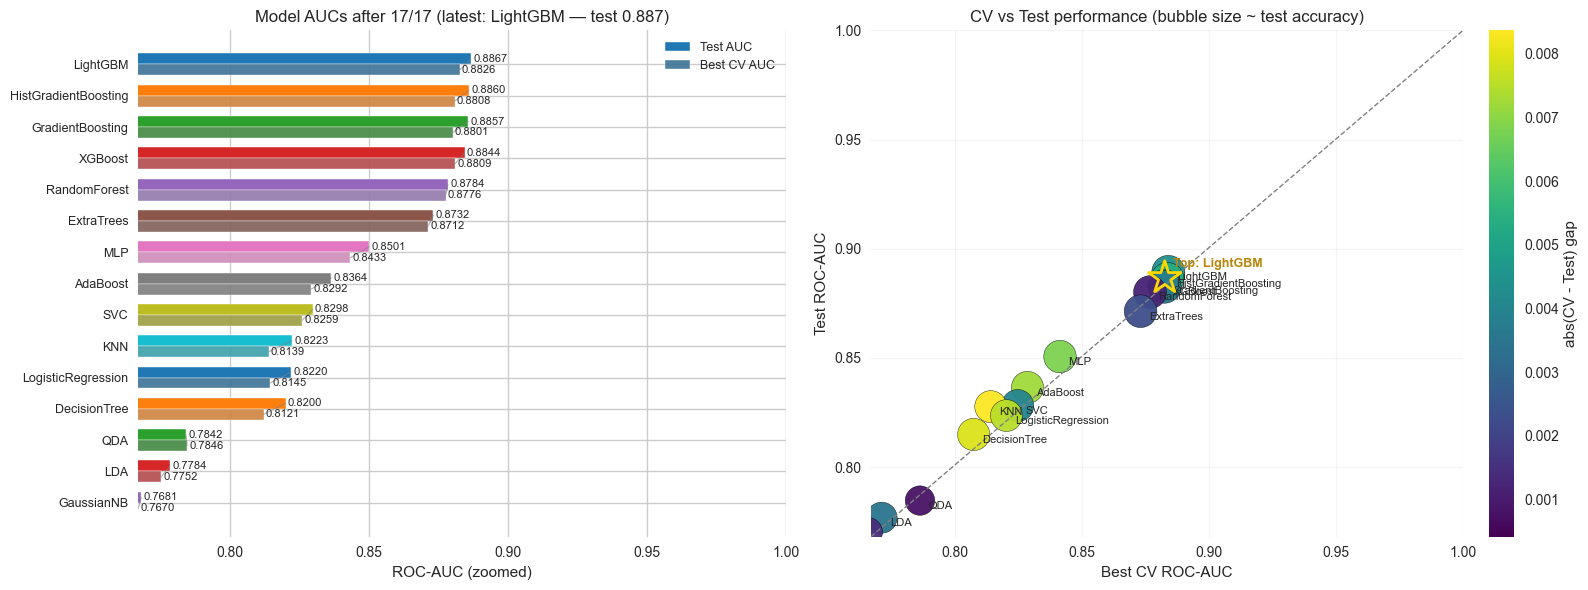

,rank_test_score,mean_test_score,std_test_score,params
6,1,0.882613,0.002521,"{'feature_fraction': 0.6873687420594126, 'lear..."
5,2,0.882141,0.002868,"{'feature_fraction': 0.7852444528883149, 'lear..."
8,3,0.882066,0.001823,"{'feature_fraction': 0.7542703315240835, 'lear..."
2,4,0.880239,0.002313,"{'feature_fraction': 0.6174250836504598, 'lear..."
0,5,0.879123,0.002775,"{'feature_fraction': 0.7123620356542087, 'lear..."
10,6,0.875954,0.002751,"{'feature_fraction': 0.884665661176, 'learning..."


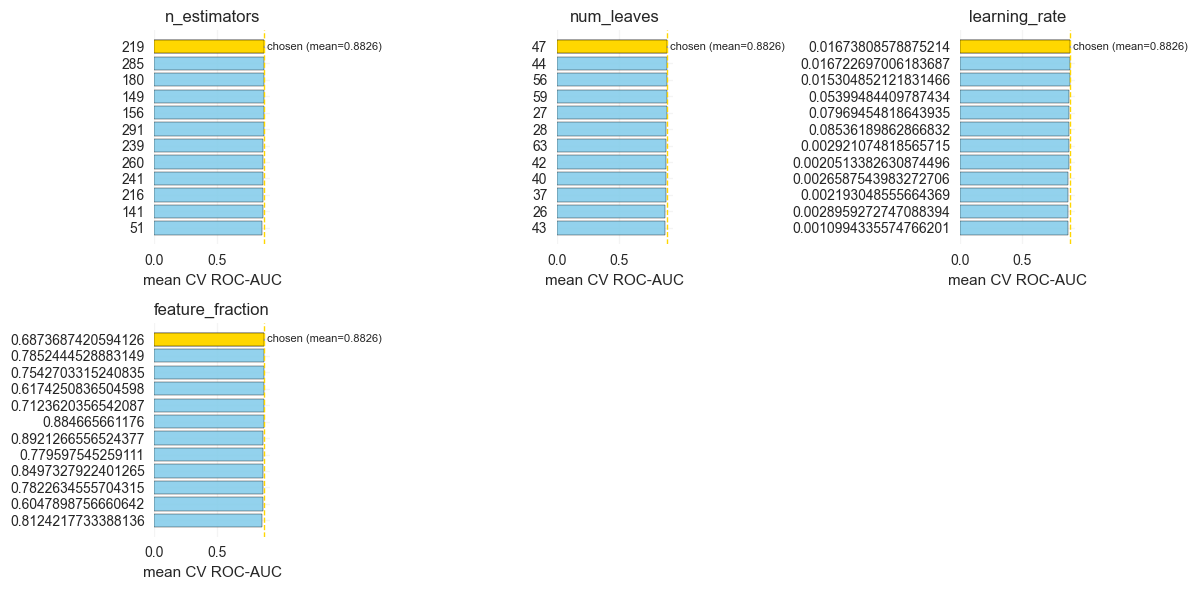

n_estimators: chosen=219 (mean CV 0.8826)
num_leaves: chosen=47 (mean CV 0.8826)
learning_rate: chosen=0.01673808578875214 (mean CV 0.8826)
feature_fraction: chosen=0.6873687420594126 (mean CV 0.8826)

Completed: LightGBM (17/17)
 best CV ROC-AUC: 0.8826
 test recall (macro): 0.6790
 test ROC-AUC: 0.8867  test accuracy: 0.7432

 Top feature importances (current model):


koi_srho            3202
transit_duration    2970
stellar_temp        2778
transit_depth       2643
planet_radius       2491
inclination         2263
koi_ror             2138
orbital_period      2086
stellar_logg        1941
stellar_mass        1846
dtype: int32

,model,best_cv_score,test_auc,test_accuracy,best_params
0,LightGBM,0.882613,0.886667,0.743206,"{'feature_fraction': 0.6873687420594126, 'lear..."
1,HistGradientBoosting,0.880835,0.885995,0.740767,"{'learning_rate': 0.029106359131330698, 'max_d..."
2,GradientBoosting,0.880122,0.885672,0.740418,"{'learning_rate': 0.037183641805732096, 'max_d..."
3,XGBoost,0.880933,0.884373,0.736237,"{'colsample_bytree': 0.6174250836504598, 'lear..."
4,RandomForest,0.877612,0.878407,0.737282,"{'max_depth': None, 'max_features': 'sqrt', 'm..."
5,ExtraTrees,0.871222,0.873202,0.724390,"{'max_depth': 20, 'max_features': None, 'n_est..."
6,MLP,0.843333,0.850058,0.711150,"{'clf__learning_rate_init': 0.001, 'clf__hidde..."
7,AdaBoost,0.829200,0.836373,0.687108,"{'learning_rate': 0.6111150117432088, 'n_estim..."
8,SVC,0.825947,0.829777,0.691638,"{'clf__C': 17.12337597316399, 'clf__degree': 2..."
9,KNN,0.813941,0.822310,0.684321,"{'clf__n_neighbors': 16, 'clf__p': 1, 'clf__we..."



Best model: LightGBM
CV ROC-AUC (best): 0.8826129825064187
Test ROC-AUC: 0.8866673667486485
[LightGBM] [Warning] feature_fraction is set=0.6873687420594126, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6873687420594126
Test recall (macro): 0.6789711125177439
[LightGBM] [Warning] feature_fraction is set=0.6873687420594126, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6873687420594126
Test f1 (macro): 0.6780197104054623
Test accuracy: 0.743205574912892

Classification report on test set:
[LightGBM] [Warning] feature_fraction is set=0.6873687420594126, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6873687420594126
              precision    recall  f1-score   support

           0     0.5213    0.3704    0.4331       594
           1     0.7268    0.8070    0.7648       824
           2     0.8141    0.8595    0.8362      1452

    accuracy                         0.7432      2870
   macro avg     0.6874    0

koi_srho            3202
transit_duration    2970
stellar_temp        2778
transit_depth       2643
planet_radius       2491
inclination         2263
koi_ror             2138
orbital_period      2086
stellar_logg        1941
stellar_mass        1846
koi_sma             1698
stellar_radius      1623
equilibrium_temp    1543
insolation          1000
dtype: int32

[LightGBM] [Warning] feature_fraction is set=0.6873687420594126, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6873687420594126


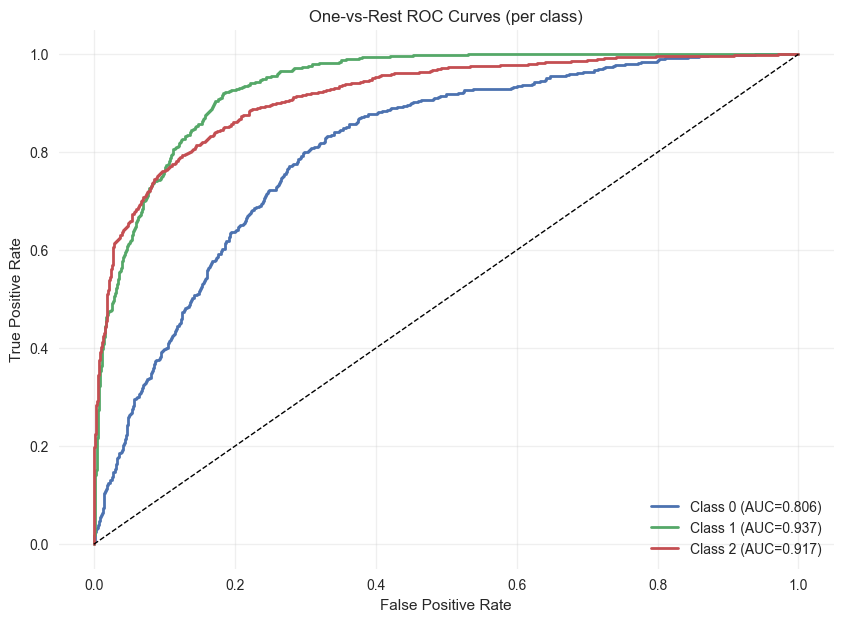

In [27]:
import traceback
from sklearn.pipeline import Pipeline
from scipy.stats import randint as sp_randint, uniform as sp_uniform, loguniform as sp_loguniform

X = X3
y = y3
X_train = X3_train
X_test = X3_test
y_train = y3_train
y_test = y3_test


# model structure + live "why this param" inspection
candidates = {
    "LogisticRegression": (
        Pipeline([("scaler", StandardScaler()), ("clf", LogisticRegression(solver="liblinear", max_iter=500, multi_class="ovr"))]),
        {
            "clf__C": sp_loguniform(1e-3, 1e3), 
            "clf__penalty": ["l2"],
        },
    ),
    "SVC": (
        Pipeline([("scaler", StandardScaler()), ("clf", SVC(probability=True))]),
        {
        "clf__C": sp_loguniform(1e-2, 1e2),
        "clf__gamma": ["scale", "auto", 0.001, 0.01, 0.1],  # ✅ no mixing with dist
        "clf__kernel": ["rbf", "linear", "poly"],
        "clf__degree": [2, 3],  
        },
    ),

    "KNN": (
        Pipeline([("scaler", StandardScaler()), ("clf", KNeighborsClassifier())]),
        {
            "clf__n_neighbors": sp_randint(1, 21),  
            "clf__weights": ["uniform", "distance"],
            "clf__p": [1, 2],
        },
    ),
    "GaussianNB": (GaussianNB(), {}),
    "LDA": (LinearDiscriminantAnalysis(), {}),
    "QDA": (QuadraticDiscriminantAnalysis(), {}),
    "DecisionTree": (
        DecisionTreeClassifier(random_state=42),
        {
            "max_depth": [3, 5, 10],  
            "min_samples_split": sp_randint(2, 11),
            "max_features": [None, "sqrt"],
        },
    ),
    "RandomForest": (
        RandomForestClassifier(random_state=42, n_jobs=-1),
        {
            "n_estimators": sp_randint(50, 301),  
            "max_depth": [None, 10, 20],
            "min_samples_split": sp_randint(2, 11),
            "max_features": ["sqrt", None],
        },
    ),
    "ExtraTrees": (
        ExtraTreesClassifier(random_state=42, n_jobs=-1),
        {
            "n_estimators": sp_randint(50, 301),
            "max_depth": [None, 10, 20],
            "max_features": ["sqrt", None],
        },
    ),
    "GradientBoosting": (
        GradientBoostingClassifier(random_state=42),
        {
            "n_estimators": sp_randint(50, 201),
            "learning_rate": sp_loguniform(1e-3, 1e-1),
            "max_depth": sp_randint(3, 8),
            "subsample": sp_uniform(0.6, 0.3),
        },
    ),
    "HistGradientBoosting": (
        HistGradientBoostingClassifier(random_state=42),
        {
            "max_iter": sp_randint(100, 201),
            "learning_rate": sp_loguniform(1e-3, 1e-1),
            "max_depth": [None, 3, 5],
        },
    ),
    "AdaBoost": (
        AdaBoostClassifier(random_state=42),
        {
            "n_estimators": sp_randint(50, 201),
            "learning_rate": sp_uniform(0.01, 1.0),
        },
    ),
    "MLP": (
        Pipeline([("scaler", StandardScaler()), ("clf", MLPClassifier(max_iter=500, random_state=42))]),
        {
            "clf__hidden_layer_sizes": [(50,), (100,), (50, 50)],
            "clf__alpha": [1e-5, 1e-4, 1e-3],
            "clf__learning_rate_init": [1e-4, 1e-3],
        },
    ),
    "SGD": (
        Pipeline([("scaler", StandardScaler()), ("clf", SGDClassifier(loss="log_loss", max_iter=2000, tol=1e-3, random_state=42))]),
        {
            "clf__alpha": sp_loguniform(1e-5, 1e-2),
            "clf__penalty": ["l2", "l1", "elasticnet", "none"],
            "clf__l1_ratio": sp_uniform(0.0, 1.0),
        },
    ),
    "CalibratedSVC": (
        Pipeline([("scaler", StandardScaler()), ("base", SVC(probability=False))]),
        {
            "base__C": sp_loguniform(1e-2, 1e1),
            "base__kernel": ["linear", "rbf"],
            "base__gamma": ["scale", "auto", sp_loguniform(1e-3, 1e-2)],
        },
    ),
}

# optional: XGBoost / LightGBM
try:
    candidates["XGBoost"] = (
        XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42, n_jobs=-1),
        {
            "n_estimators": sp_randint(50, 301),
            "max_depth": sp_randint(3, 8),
            "learning_rate": sp_loguniform(1e-3, 1e-1), 
            "colsample_bytree": sp_uniform(0.6, 0.3),
        },
    )
except Exception:
    pass

try:
    candidates["LightGBM"] = (
        LGBMClassifier(random_state=42, n_jobs=-1),
        {
            "n_estimators": sp_randint(50, 301),
            "num_leaves": sp_randint(20, 64),
            "learning_rate": sp_loguniform(1e-3, 1e-1),
            "feature_fraction": sp_uniform(0.6, 0.3),
        },
    )
except Exception:
    pass

results = []
n_iter = 12
cv = 3
scoring = "roc_auc_ovr"   # 👈 IMPORTANT: tells sklearn it's multiclass
random_state = 42

def extract_inner(est):
    if isinstance(est, Pipeline):
        return est.named_steps[list(est.named_steps)[-1]]
    return est


sns.set_style("whitegrid")
plt.ioff()
rng = np.random.RandomState(random_state)

for i, (name, (estimator, param_dist)) in enumerate(candidates.items(), 1):
    if param_dist:
        try:
            max_choices = max(1, sum(len(v) for v in param_dist.values()))
        except Exception:
            max_choices = n_iter
    else:
        max_choices = 1

    rs = RandomizedSearchCV(
        estimator,
        param_distributions=param_dist,
        n_iter=min(n_iter, max_choices),
        scoring=scoring,   # 👈 now using multiclass-safe scorer
        cv=cv,
        n_jobs=-1,
        verbose=0,
        random_state=random_state,
        refit=True,
    )

    rs.error_score = "raise"
    try:
        rs.fit(X_train, y_train)
    except Exception as e:
        print(f"RandomizedSearchCV failed for {name}: {e}")
        traceback.print_exc()
        continue

    best = rs.best_estimator_
    y_pred = best.predict(X_test)

    # ✅ multiclass ROC-AUC handling
    if hasattr(best, "predict_proba"):
        y_proba = best.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_proba, multi_class="ovr")
    elif hasattr(best, "decision_function"):
        y_scores = best.decision_function(X_test)
        test_auc = roc_auc_score(y_test, y_scores, multi_class="ovr")
    else:
        y_proba = None
        test_auc = accuracy_score(y_test, y_pred)  # fallback

    test_acc = accuracy_score(y_test, y_pred)

    results.append(
        {
            "model": name,
            "best_cv_score": rs.best_score_,
            "best_params": rs.best_params_,
            "test_auc": test_auc,
            "test_accuracy": test_acc,
            "estimator": best,
            "cv_std": np.mean(rs.cv_results_["std_test_score"]) if hasattr(rs, "cv_results_") else 0.0,
        }
    )

    cur_df = pd.DataFrame(results).sort_values("test_auc", ascending=False).reset_index(drop=True)

    # nicer live plot (main comparison)
    clear_output(wait=True)
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    palette = sns.color_palette("tab10", n_colors=len(cur_df))
    axes[0].set_title(f"Model AUCs after {i}/{len(candidates)} (latest: {name} — test {test_auc:.3f})")
    indices = np.arange(len(cur_df))
    height = 0.35

    axes[0].barh(indices - height/2, cur_df["test_auc"], height=height, color=palette, label="Test AUC")
    axes[0].barh(indices + height/2, cur_df["best_cv_score"], height=height, color=[sns.desaturate(c, 0.6) for c in palette], alpha=0.9, label="Best CV AUC")
    axes[0].set_yticks(indices)
    axes[0].set_yticklabels(cur_df["model"], fontsize=9)
    axes[0].invert_yaxis()
    axes[0].set_xlim(min(cur_df["test_auc"].min(), cur_df["best_cv_score"].min()), 1.00)
    axes[0].set_xlabel("ROC-AUC (zoomed)")
    axes[0].legend(fontsize=9)
    for idx in range(len(cur_df)):
        axes[0].text(cur_df.loc[idx, "test_auc"] + 0.0008, idx - height/2, f"{cur_df.loc[idx,'test_auc']:.4f}", va="center", fontsize=8)
        axes[0].text(cur_df.loc[idx, "best_cv_score"] + 0.0008, idx + height/2, f"{cur_df.loc[idx,'best_cv_score']:.4f}", va="center", fontsize=8)
        axes[0].plot([cur_df.loc[idx, "best_cv_score"], cur_df.loc[idx, "test_auc"]], [idx + height/2, idx - height/2], color="gray", linewidth=0.8, alpha=0.6)

    # scatter CV vs Test (bubble = accuracy)
    axes[1].set_title("CV vs Test performance (bubble size ~ test accuracy)")
    x = cur_df["best_cv_score"].values
    y = cur_df["test_auc"].values
    jitter_scale = 0.0025
    x_j = x + rng.normal(scale=jitter_scale, size=len(x))
    y_j = y + rng.normal(scale=jitter_scale, size=len(y))
    sizes = 120 + 600 * cur_df["test_accuracy"].values
    gap = np.abs(cur_df["best_cv_score"] - cur_df["test_auc"]).values
    cmap = plt.cm.get_cmap("viridis")
    colors = cmap(np.clip(gap / (gap.max() + 1e-6), 0, 1))

    sc = axes[1].scatter(x_j, y_j, s=sizes, c=colors, edgecolor="k", alpha=0.95)
    axes[1].plot([min(x), 1.0], [min(y), 1.0], ls="--", color="gray", linewidth=1)
    for j, row in cur_df.iterrows():
        axes[1].annotate(row["model"], (x_j[j], y_j[j]), xytext=(6, -6), textcoords="offset points", fontsize=8)
    if not cur_df.empty:
        top = cur_df.iloc[0]
        axes[1].scatter([top["best_cv_score"]], [top["test_auc"]], s=600, facecolors="none", edgecolors="gold", linewidths=2, marker="*", zorder=10)
        axes[1].annotate(f"Top: {top['model']}", (top["best_cv_score"], top["test_auc"]), xytext=(6, 8), textcoords="offset points", fontsize=9, weight="bold", color="darkgoldenrod")

    axes[1].set_xlabel("Best CV ROC-AUC")
    axes[1].set_ylabel("Test ROC-AUC")
    axes[1].set_xlim(min(x), 1.00)
    axes[1].set_ylim(min(y), 1.00)
    axes[1].grid(alpha=0.2)

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=gap.min(), vmax=gap.max()))
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=axes[1], fraction=0.046, pad=0.04)
    cbar.set_label("abs(CV - Test) gap")

    plt.tight_layout()
    display(fig)
    plt.close(fig)

    # Show the "self-learning" details: what the search evaluated and why it was chosen
    df_cv = pd.DataFrame(rs.cv_results_)
    display(df_cv.sort_values("rank_test_score").head(6)[["rank_test_score", "mean_test_score", "std_test_score", "params"]])

    # plot aggregated effect for each hyperparameter we searched
    if param_dist:
        # small grid of plots (one per hyperparameter)
        keys = list(param_dist.keys())
        n_plots = len(keys)
        ncols = min(3, n_plots) if n_plots else 1
        nrows = int(np.ceil(n_plots / ncols)) if n_plots else 1
        fig2, axs2 = plt.subplots(nrows, ncols, figsize=(4 * ncols, 3 * max(1, nrows)))
        axs2 = np.array(axs2).reshape(-1) if n_plots > 1 else [axs2]  # flat list
        for ax_idx, p in enumerate(keys):
            axp = axs2[ax_idx]
            col = f"param_{p}"
            if col in df_cv:
                # aggregate mean score per value
                agg = df_cv.groupby(col)["mean_test_score"].agg(["mean", "std"]).sort_values("mean", ascending=True)
                # convert index to string for plotting clarity
                agg_idx = agg.index.astype(str)
                axp.barh(agg_idx, agg["mean"], xerr=agg["std"], color="skyblue", edgecolor="k", alpha=0.9)
                axp.set_title(p)
                axp.set_xlabel("mean CV ROC-AUC")
                # annotate chosen
                chosen_val = rs.best_params_.get(p, None)
                if chosen_val is not None:
                    axp.axvline(rs.best_score_, color="gold", linestyle="--", linewidth=1)
                    # try to highlight chosen entry
                    try:
                        match_mask = agg.index.astype(str) == str(chosen_val)
                        if match_mask.any():
                            matched_idx = agg.index[match_mask][0]
                            chosen_mean = agg.loc[matched_idx, "mean"]
                            axp.barh(str(matched_idx), chosen_mean, color="gold", edgecolor="k")
                            axp.text(chosen_mean + 1e-4, list(match_mask).index(True), f" chosen (mean={chosen_mean:.4f})", va="center", fontsize=8)
                    except Exception:
                        pass
            else:
                axp.text(0.5, 0.5, "no data", ha="center")
            axp.grid(alpha=0.2)
        # hide unused axes
        for k in range(len(keys), len(axs2)):
            axs2[k].axis("off")
        plt.tight_layout()
        display(fig2)
        plt.close(fig2)

        # textual rationale per hyperparameter
        for p in keys:
            col = f"param_{p}"
            if col in df_cv:
                best_val = rs.best_params_.get(p, None)
                # mean score of chosen val
                sel_mean = df_cv[df_cv[col] == best_val]["mean_test_score"].mean() if best_val is not None else None
                print(f"{p}: chosen={best_val} (mean CV {sel_mean:.4f})" if sel_mean is not None else f"{p}: chosen={best_val}")
            else:
                print(f"{p}: (no per-value breakdown available)")

    # short model summary and feature importances
    print(f"\nCompleted: {name} ({i}/{len(candidates)})")
    print(" best CV ROC-AUC:", f"{rs.best_score_:.4f}")
    print(" test recall (macro):", f"{recall_score(y_test, y_pred, average='macro'):.4f}")
    print(" test ROC-AUC:", f"{test_auc:.4f}", " test accuracy:", f"{test_acc:.4f}")

    inner = extract_inner(best)
    if hasattr(inner, "feature_importances_"):
        importances = inner.feature_importances_
        feat_series = pd.Series(importances, index=X.columns).sort_values(ascending=False)
        print("\n Top feature importances (current model):")
        display(feat_series.head(10))

    time.sleep(0.15)

results_df = pd.DataFrame(results).sort_values("test_auc", ascending=False).reset_index(drop=True)
display(results_df[["model", "best_cv_score", "test_auc", "test_accuracy", "best_params"]])

best_row = results_df.loc[0]
best_model = best_row["estimator"]
print(f"\nBest model: {best_row['model']}")
print("CV ROC-AUC (best):", best_row["best_cv_score"])
print("Test ROC-AUC:", best_row["test_auc"])
print("Test recall (macro):", recall_score(y_test, best_model.predict(X_test), average="macro"))
print("Test f1 (macro):", f1_score(y_test, best_model.predict(X_test), average="macro"))
print("Test accuracy:", best_row["test_accuracy"])

print("\nClassification report on test set:")
print(classification_report(y_test, best_model.predict(X_test), digits=4))

# Feature importances if available
inner = extract_inner(best_model)
if hasattr(inner, "feature_importances_"):
    importances = inner.feature_importances_
    feat_series = pd.Series(importances, index=X.columns).sort_values(ascending=False)
    print("\nTop feature importances (best model):")
    display(feat_series.head(15))

# === Per-class ROC curves for best model ===
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

if hasattr(best_model, "predict_proba"):
    y_proba = best_model.predict_proba(X_test)
else:
    y_proba = best_model.decision_function(X_test)

plt.figure(figsize=(10, 7))
for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Class {cls} (AUC={roc_auc:.3f})")

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC Curves (per class)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

best_estimator = best_model
results_summary = results_df



In [28]:
# Save the best model and results summary
import joblib
joblib.dump(best_estimator, 'best_model_kepler.pkl')
results_summary.to_csv('model_results_summary_kepler.csv', index=False)